In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from matplotlib.ticker import MaxNLocator


===== TRAINING SUMMARY =====
Total Epochs: 200
Best PSNR: 28.5519 dB at Epoch 93
Best SSIM: 0.8068 at Epoch 200
Final PSNR: 28.2892 dB
Final SSIM: 0.8068
PSNR Improvement: 2.1755 dB
SSIM Improvement: 0.0959
Loss Reduction: 0.123283
Epochs to reach 90% of max PSNR: 16
Epochs to reach 90% of max SSIM: 57
Analysis completed. Visualizations saved to /data/users4/mesfahani1/project09_super_res/reports/analysis/


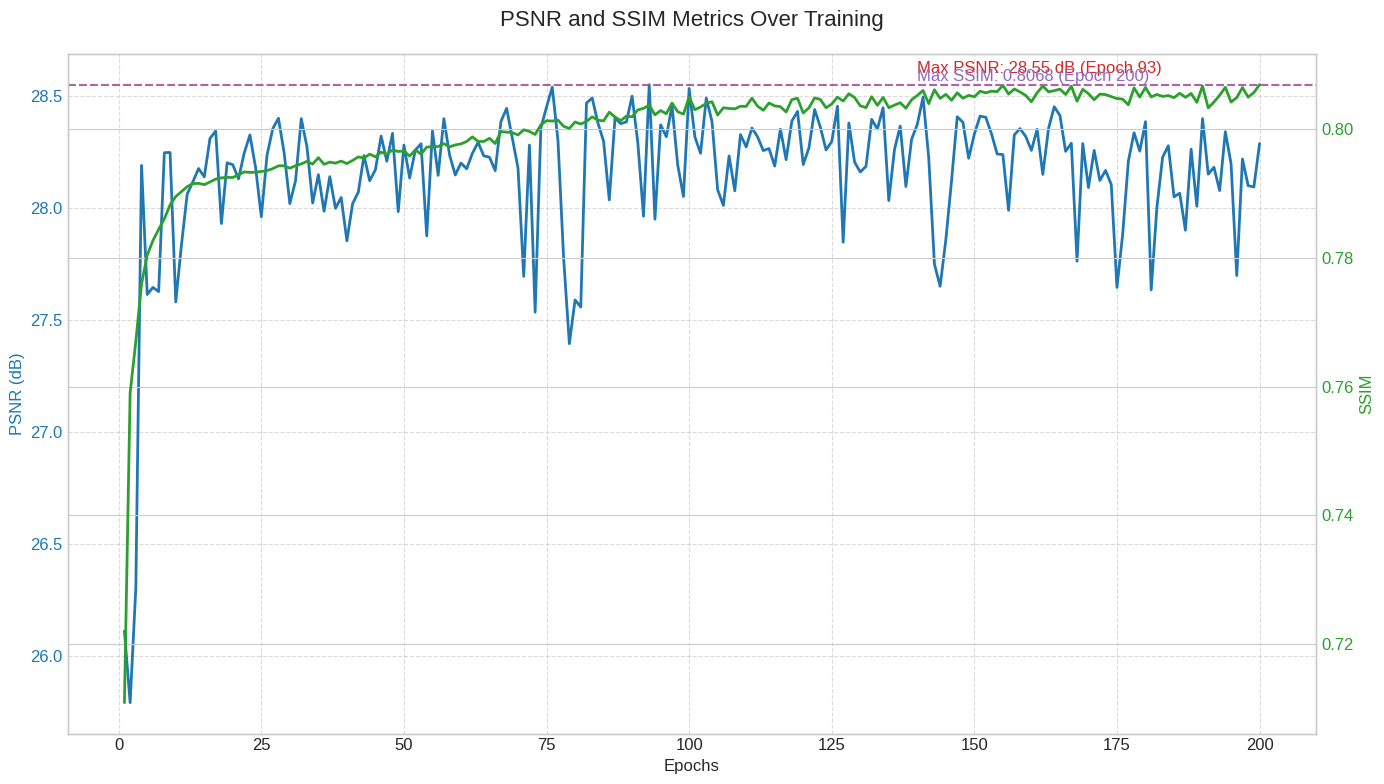

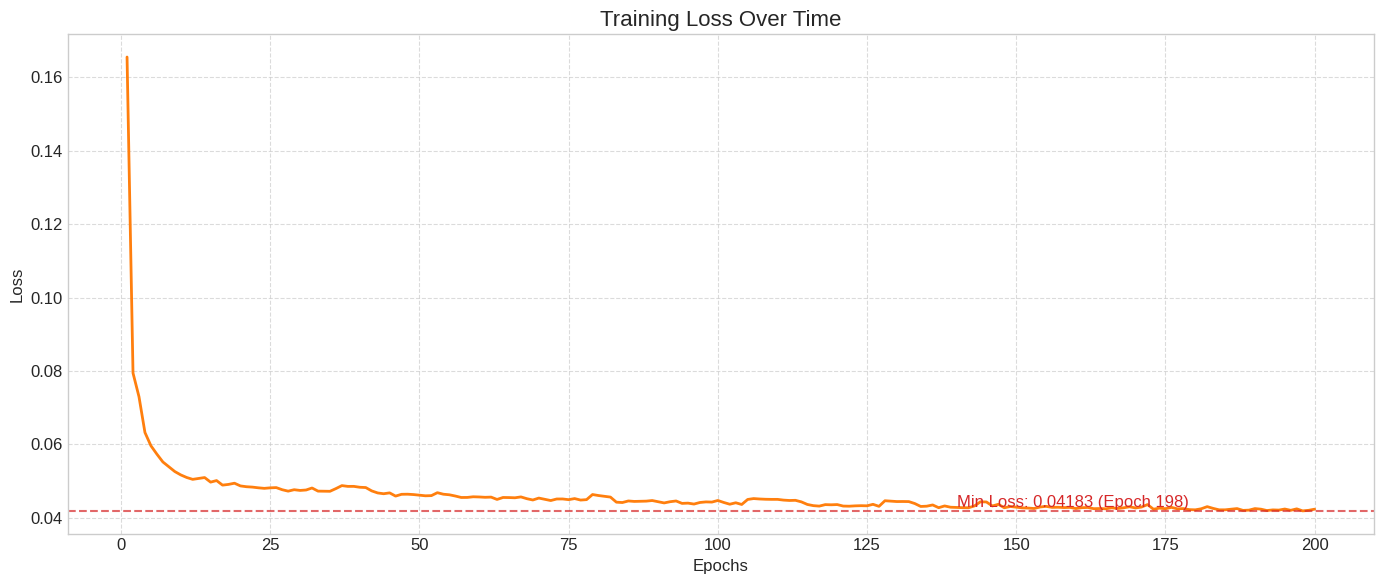

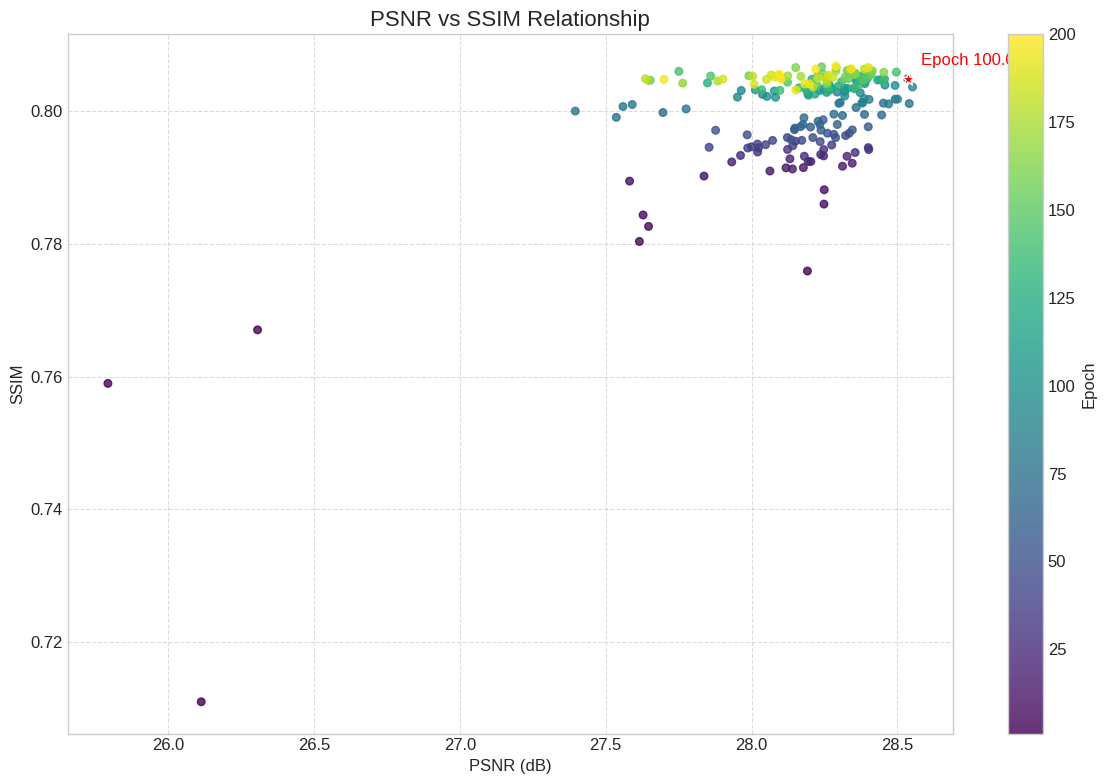

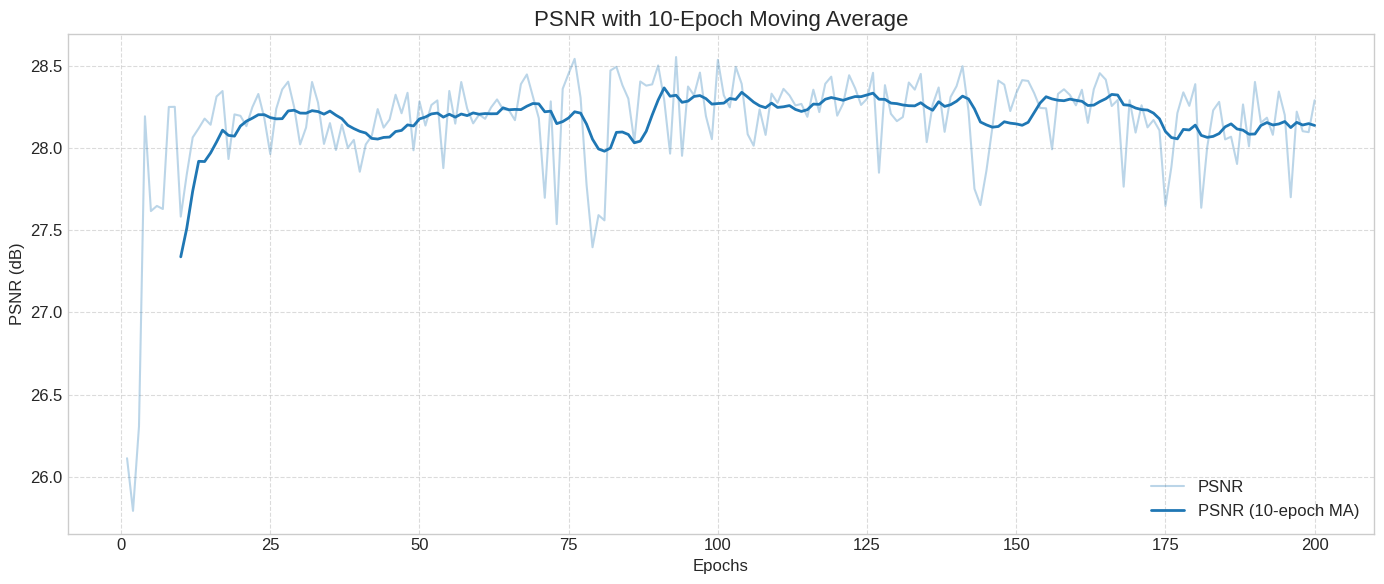

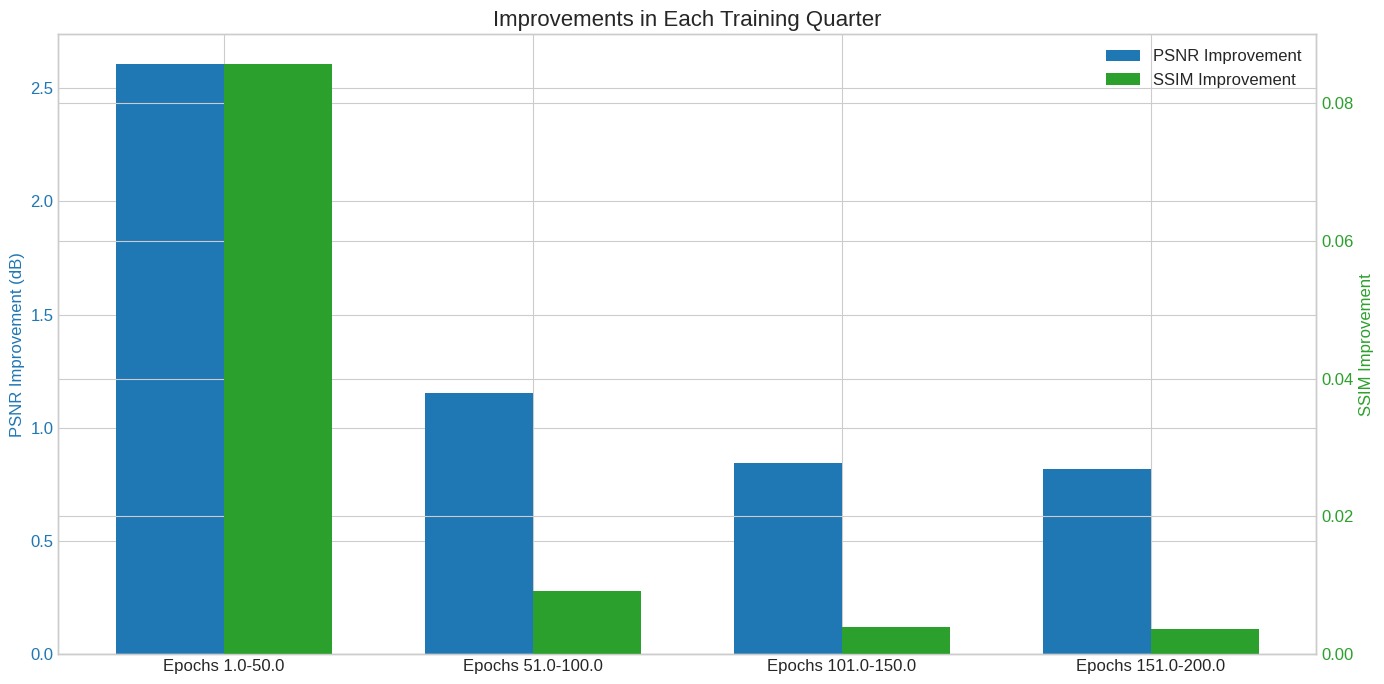

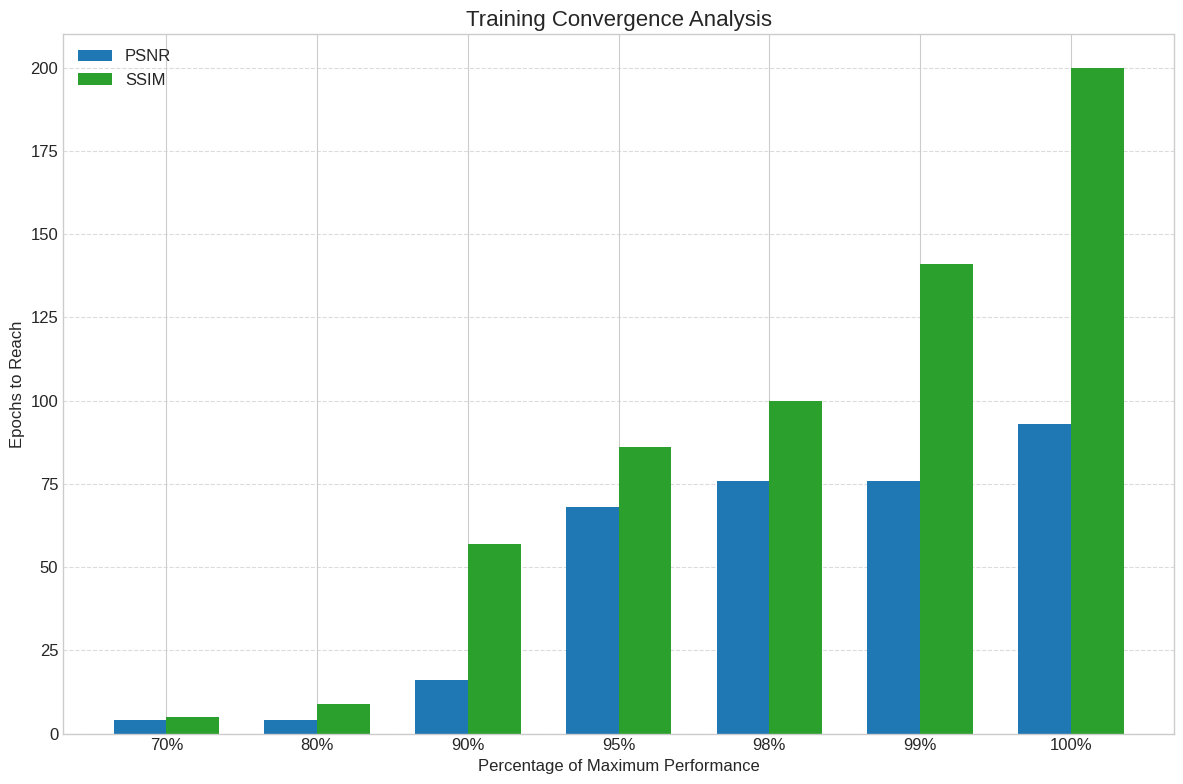

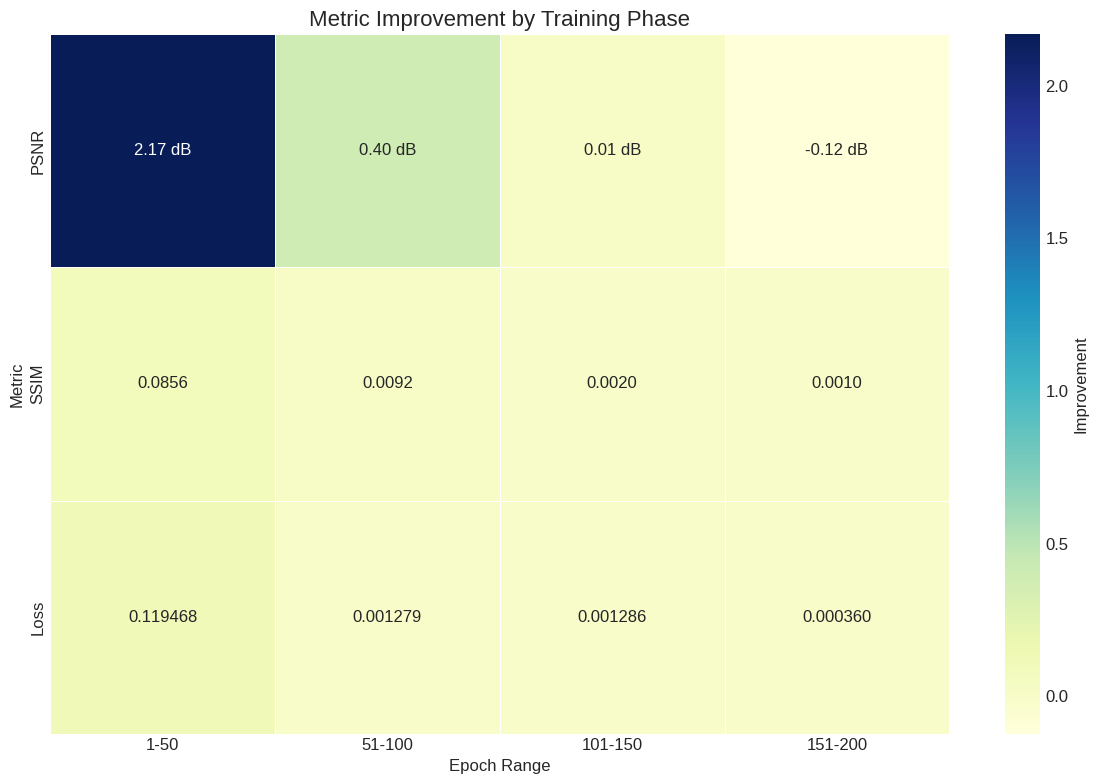

In [2]:
# Set plot styling
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['font.size'] = 12

# Define file path
csv_path = "/data/users4/mesfahani1/project09_super_res/reports/logs/USRGAN_model1/metrics_20250319_070935.csv"

# Load the data
df = pd.read_csv(csv_path)

# Create output directory for plots if it doesn't exist
output_dir = "/data/users4/mesfahani1/project09_super_res/reports/analysis"
os.makedirs(output_dir, exist_ok=True)

# 1. PSNR and SSIM over time
fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot PSNR
color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('PSNR (dB)', color=color)
ax1.plot(df['Epoch'], df['PSNR'], color=color, linewidth=2)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True, linestyle='--', alpha=0.7)

# Create a second y-axis for SSIM
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('SSIM', color=color)
ax2.plot(df['Epoch'], df['SSIM'], color=color, linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Add horizontal line at maximum PSNR
max_psnr = df['PSNR'].max()
max_psnr_epoch = df.loc[df['PSNR'].idxmax(), 'Epoch']
ax1.axhline(y=max_psnr, color='tab:red', linestyle='--', alpha=0.7)
ax1.text(df['Epoch'].max()*0.7, max_psnr+0.05, f'Max PSNR: {max_psnr:.2f} dB (Epoch {max_psnr_epoch})', 
         color='tab:red', fontsize=12)

# Add horizontal line at maximum SSIM
max_ssim = df['SSIM'].max()
max_ssim_epoch = df.loc[df['SSIM'].idxmax(), 'Epoch']
ax2.axhline(y=max_ssim, color='tab:purple', linestyle='--', alpha=0.7)
ax2.text(df['Epoch'].max()*0.7, max_ssim+0.0005, f'Max SSIM: {max_ssim:.4f} (Epoch {max_ssim_epoch})', 
         color='tab:purple', fontsize=12)

plt.title('PSNR and SSIM Metrics Over Training', fontsize=16, pad=20)
fig.tight_layout()
plt.savefig(f"{output_dir}/psnr_ssim_over_time.png", dpi=300, bbox_inches='tight')

# 2. Loss over time
plt.figure(figsize=(14, 6))
plt.plot(df['Epoch'], df['Loss'], color='tab:orange', linewidth=2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.7)
min_loss = df['Loss'].min()
min_loss_epoch = df.loc[df['Loss'].idxmin(), 'Epoch']
plt.axhline(y=min_loss, color='tab:red', linestyle='--', alpha=0.7)
plt.text(df['Epoch'].max()*0.7, min_loss+0.001, f'Min Loss: {min_loss:.5f} (Epoch {min_loss_epoch})', 
         color='tab:red', fontsize=12)
plt.tight_layout()
plt.savefig(f"{output_dir}/loss_over_time.png", dpi=300, bbox_inches='tight')

# 3. PSNR vs SSIM scatter plot with color gradient by epoch
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['PSNR'], df['SSIM'], c=df['Epoch'], cmap='viridis', s=30, alpha=0.8)
plt.colorbar(scatter, label='Epoch')
plt.xlabel('PSNR (dB)')
plt.ylabel('SSIM')
plt.grid(True, linestyle='--', alpha=0.7)
plt.title('PSNR vs SSIM Relationship', fontsize=16)

# Mark the best point (highest combined PSNR and SSIM)
# Simple metric: normalize both to 0-1 range and take average
psnr_norm = (df['PSNR'] - df['PSNR'].min()) / (df['PSNR'].max() - df['PSNR'].min())
ssim_norm = (df['SSIM'] - df['SSIM'].min()) / (df['SSIM'].max() - df['SSIM'].min())
combined = (psnr_norm + ssim_norm) / 2
best_idx = combined.idxmax()
best_epoch = df.iloc[best_idx]['Epoch']
best_psnr = df.iloc[best_idx]['PSNR']
best_ssim = df.iloc[best_idx]['SSIM']

plt.scatter([best_psnr], [best_ssim], color='red', s=100, marker='*', edgecolor='white')
plt.annotate(f'Epoch {best_epoch}', (best_psnr, best_ssim), xytext=(10, 10), 
             textcoords='offset points', fontsize=12, color='red')
plt.tight_layout()
plt.savefig(f"{output_dir}/psnr_vs_ssim.png", dpi=300, bbox_inches='tight')

# 4. Moving averages to see trends more clearly
window_size = 10
df['PSNR_MA'] = df['PSNR'].rolling(window=window_size).mean()
df['SSIM_MA'] = df['SSIM'].rolling(window=window_size).mean()
df['Loss_MA'] = df['Loss'].rolling(window=window_size).mean()

plt.figure(figsize=(14, 6))
plt.plot(df['Epoch'], df['PSNR'], color='tab:blue', alpha=0.3, label='PSNR')
plt.plot(df['Epoch'], df['PSNR_MA'], color='tab:blue', linewidth=2, label=f'PSNR ({window_size}-epoch MA)')
plt.xlabel('Epochs')
plt.ylabel('PSNR (dB)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.title(f'PSNR with {window_size}-Epoch Moving Average', fontsize=16)
plt.tight_layout()
plt.savefig(f"{output_dir}/psnr_moving_average.png", dpi=300, bbox_inches='tight')

# 5. Training progression by quarter
quarters = 4
quarter_size = len(df) // quarters
improvements = []
quarter_labels = []

for i in range(quarters):
    start_idx = i * quarter_size
    end_idx = (i + 1) * quarter_size if i < quarters - 1 else len(df)
    start_epoch = df.iloc[start_idx]['Epoch']
    end_epoch = df.iloc[end_idx-1]['Epoch']
    quarter_data = df.iloc[start_idx:end_idx]
    
    psnr_improvement = quarter_data['PSNR'].max() - quarter_data['PSNR'].min()
    ssim_improvement = quarter_data['SSIM'].max() - quarter_data['SSIM'].min()
    
    quarter_labels.append(f"Epochs {start_epoch}-{end_epoch}")
    improvements.append([psnr_improvement, ssim_improvement])

improvements = np.array(improvements)

# Plot improvements by quarter
fig, ax1 = plt.subplots(figsize=(14, 7))

x = np.arange(len(quarter_labels))
width = 0.35

ax1.bar(x - width/2, improvements[:, 0], width, label='PSNR Improvement', color='tab:blue')
ax1.set_ylabel('PSNR Improvement (dB)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.bar(x + width/2, improvements[:, 1], width, label='SSIM Improvement', color='tab:green')
ax2.set_ylabel('SSIM Improvement', color='tab:green')
ax2.tick_params(axis='y', labelcolor='tab:green')

ax1.set_xticks(x)
ax1.set_xticklabels(quarter_labels)
plt.title('Improvements in Each Training Quarter', fontsize=16)

# Add legend with both metrics
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')

plt.tight_layout()
plt.savefig(f"{output_dir}/improvements_by_quarter.png", dpi=300, bbox_inches='tight')

# 6. Epochs to reach percentage of max performance
psnr_max = df['PSNR'].max()
ssim_max = df['SSIM'].max()
percentages = [0.7, 0.8, 0.9, 0.95, 0.98, 0.99, 1.0]
psnr_epochs = []
ssim_epochs = []

# Normalize metrics to 0-1 range relative to their min-max
psnr_normalized = (df['PSNR'] - df['PSNR'].min()) / (psnr_max - df['PSNR'].min())
ssim_normalized = (df['SSIM'] - df['SSIM'].min()) / (ssim_max - df['SSIM'].min())

for p in percentages:
    # Find first epoch where normalized metric exceeds p
    try:
        psnr_epoch = df.loc[psnr_normalized >= p, 'Epoch'].iloc[0]
    except IndexError:
        psnr_epoch = None
    
    try:
        ssim_epoch = df.loc[ssim_normalized >= p, 'Epoch'].iloc[0]
    except IndexError:
        ssim_epoch = None
    
    psnr_epochs.append(psnr_epoch)
    ssim_epochs.append(ssim_epoch)

# Create a DataFrame for the convergence analysis
convergence_df = pd.DataFrame({
    'Percentage': [f"{int(p*100)}%" for p in percentages],
    'PSNR_Epoch': psnr_epochs,
    'SSIM_Epoch': ssim_epochs
})

# Plot convergence analysis
plt.figure(figsize=(12, 8))
bar_width = 0.35
x = np.arange(len(percentages))

plt.bar(x - bar_width/2, psnr_epochs, bar_width, label='PSNR', color='tab:blue')
plt.bar(x + bar_width/2, ssim_epochs, bar_width, label='SSIM', color='tab:green')

plt.xlabel('Percentage of Maximum Performance')
plt.ylabel('Epochs to Reach')
plt.title('Training Convergence Analysis', fontsize=16)
plt.xticks(x, [f"{int(p*100)}%" for p in percentages])
plt.legend()
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f"{output_dir}/convergence_analysis.png", dpi=300, bbox_inches='tight')

# 7. Generate summary statistics table
summary = pd.DataFrame({
    'Metric': ['PSNR (dB)', 'SSIM', 'Loss'],
    'Start': [df['PSNR'].iloc[0], df['SSIM'].iloc[0], df['Loss'].iloc[0]],
    'End': [df['PSNR'].iloc[-1], df['SSIM'].iloc[-1], df['Loss'].iloc[-1]],
    'Min': [df['PSNR'].min(), df['SSIM'].min(), df['Loss'].min()],
    'Max': [df['PSNR'].max(), df['SSIM'].max(), df['Loss'].max()],
    'Mean': [df['PSNR'].mean(), df['SSIM'].mean(), df['Loss'].mean()],
    'Std Dev': [df['PSNR'].std(), df['SSIM'].std(), df['Loss'].std()],
    'Best Epoch': [
        df.loc[df['PSNR'].idxmax(), 'Epoch'],
        df.loc[df['SSIM'].idxmax(), 'Epoch'],
        df.loc[df['Loss'].idxmin(), 'Epoch']
    ]
})

# Save summary statistics to CSV
summary.to_csv(f"{output_dir}/training_summary.csv", index=False)

# 8. Metric improvement heatmap
# Define ranges for analysis
epoch_ranges = [(1, 50), (51, 100), (101, 150), (151, 200)]
metrics = ['PSNR', 'SSIM', 'Loss']

improvements_matrix = np.zeros((len(metrics), len(epoch_ranges)))

for i, metric in enumerate(metrics):
    for j, (start, end) in enumerate(epoch_ranges):
        # Filter data for the epoch range
        range_data = df[(df['Epoch'] >= start) & (df['Epoch'] <= end)]
        
        if metric == 'Loss':
            # For loss, improvement is decrease
            improvement = range_data[metric].iloc[0] - range_data[metric].iloc[-1]
        else:
            # For PSNR and SSIM, improvement is increase
            improvement = range_data[metric].iloc[-1] - range_data[metric].iloc[0]
        
        improvements_matrix[i, j] = improvement

# Create heatmap labels
heatmap_labels = np.zeros_like(improvements_matrix, dtype=object)
for i in range(len(metrics)):
    for j in range(len(epoch_ranges)):
        value = improvements_matrix[i, j]
        if metrics[i] == 'Loss':
            heatmap_labels[i, j] = f"{value:.6f}"
        elif metrics[i] == 'PSNR':
            heatmap_labels[i, j] = f"{value:.2f} dB"
        else:
            heatmap_labels[i, j] = f"{value:.4f}"

# Plot heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(improvements_matrix, annot=heatmap_labels, fmt="", cmap="YlGnBu",
                linewidths=.5, cbar_kws={'label': 'Improvement'})

# Set labels
ax.set_xticklabels([f"{start}-{end}" for start, end in epoch_ranges])
ax.set_yticklabels(metrics)
ax.set_xlabel('Epoch Range')
ax.set_ylabel('Metric')
plt.title('Metric Improvement by Training Phase', fontsize=16)
plt.tight_layout()
plt.savefig(f"{output_dir}/improvement_heatmap.png", dpi=300, bbox_inches='tight')

# Print summary information to console
print("\n===== TRAINING SUMMARY =====")
print(f"Total Epochs: {df['Epoch'].max()}")
print(f"Best PSNR: {df['PSNR'].max():.4f} dB at Epoch {df.loc[df['PSNR'].idxmax(), 'Epoch']}")
print(f"Best SSIM: {df['SSIM'].max():.4f} at Epoch {df.loc[df['SSIM'].idxmax(), 'Epoch']}")
print(f"Final PSNR: {df['PSNR'].iloc[-1]:.4f} dB")
print(f"Final SSIM: {df['SSIM'].iloc[-1]:.4f}")
print(f"PSNR Improvement: {df['PSNR'].iloc[-1] - df['PSNR'].iloc[0]:.4f} dB")
print(f"SSIM Improvement: {df['SSIM'].iloc[-1] - df['SSIM'].iloc[0]:.4f}")
print(f"Loss Reduction: {df['Loss'].iloc[0] - df['Loss'].iloc[-1]:.6f}")
print(f"Epochs to reach 90% of max PSNR: {psnr_epochs[2]}")
print(f"Epochs to reach 90% of max SSIM: {ssim_epochs[2]}")
print("============================")

print(f"Analysis completed. Visualizations saved to {output_dir}/")